## Init

In [4]:
%ls -lah ../data

total 22M
drwxr-xr-x  5 root root  160 Oct  7 18:54 ./
drwxr-xr-x 11 root root  352 Oct  7 18:54 ../
-rw-r--r--  1 root root  21M Feb 25  2019 dataset.csv
-rw-r--r--  1 root root  396 Feb 25  2019 template.csv
-rw-r--r--  1 root root 571K Oct  7 18:57 test_predictions.csv


In [5]:
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [6]:
df = pd.read_csv("../data/dataset.csv", sep=";")
df.shape

(99976, 43)

## Sanity checks

In [7]:
df.head()

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,...,1,1,1,1,0,0,0,178839,9.653333,1.0
1,0e961183-8c15-4470-9a5e-07a1bd207661,0.0,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,1,1,2,2,0,0,0,49014,13.181389,NaN
2,d8edaae6-4368-44e0-941e-8328f203e64e,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1,1,2,2,0,0,0,124839,11.561944,1.0
3,0095dfb6-a886-4e2a-b056-15ef45fdb0ef,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0,0,0,324676,15.751111,1.0
4,c8f8b835-5647-4506-bf15-49105d8af30b,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0,1,1,1,0,0,0,7100,12.698611,NaN


In [8]:
df.tail()

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
99971,5c03bc63-ea65-4ffd-aa7b-95ea9a46db34,NaN,0,0.0,0.0,0.0,NaN,1.0,1.0,NaN,...,1,1,1,1,0,0,0,60127,10.765556,NaN
99972,f8db22f4-9819-420c-abbc-9ddf1843176e,NaN,0,0.0,0.0,0.0,0.004044,1.0,1.0,NaN,...,1,0,1,1,0,7948,0,4740,21.708333,NaN
99973,b22e21ea-b1b2-4df3-b236-0ff6d5fdc0d8,NaN,45671,0.0,20.0,0.0,0.705078,2.0,2.0,2.0,...,0,0,0,0,0,17447,19627,3100,2.185278,NaN
99974,bafcab15-9898-479c-b729-c9dda7edb78f,NaN,56102,0.0,0.0,0.0,0.064175,1.0,2.0,1.0,...,1,1,1,1,0,18339,56180,34785,9.725278,NaN
99975,ac88f18c-96a6-49bc-9e9d-a780225914af,NaN,0,0.0,0.0,0.0,NaN,1.0,1.0,NaN,...,1,2,2,2,0,0,0,30602,11.585278,NaN


In [9]:
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 0


In [10]:
# Number of NaNs per each row
df.isnull().sum(axis=1).value_counts()

1     13582
7     13034
12    11752
2     10173
8      9130
0      9111
6      6460
10     5901
3      4595
9      3921
11     3367
4      3239
15     1841
5      1831
13     1604
14      258
16      177
dtype: int64

In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
uuid,99976,99976,51dc75a9-5791-4163-b271-e5aa06bcdd06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,89976,NaN,NaN,NaN,0.0143149,0.118786,0,0,0,0,1
account_amount_added_12_24m,99976,NaN,NaN,NaN,12255.1,35481.5,0,0,0,4937.25,1.12878e+06
account_days_in_dc_12_24m,88140,NaN,NaN,NaN,0.223043,5.80812,0,0,0,0,365
account_days_in_rem_12_24m,88140,NaN,NaN,NaN,5.04462,22.864,0,0,0,0,365
account_days_in_term_12_24m,88140,NaN,NaN,NaN,0.286896,2.92991,0,0,0,0,97
account_incoming_debt_vs_paid_0_24m,40661,NaN,NaN,NaN,1.33129,26.4823,0,0,0.152082,0.662952,3914
account_status,45603,NaN,NaN,NaN,1.04217,0.202713,1,1,1,1,4
account_worst_status_0_3m,45603,NaN,NaN,NaN,1.17291,0.420142,1,1,1,1,4
account_worst_status_12_24m,33215,NaN,NaN,NaN,1.33735,0.575043,1,1,1,2,4


### Notes

- 10k test rows
- Minimum vaue for `time_hours` looks suspicious (~0.000028h = 1sec)
- Looks like NaNs for some features might be associated with the historical data that might be missing for some of the clients

## Split data

In [12]:
df_train = df[~df.default.isnull()]
df_test = df[df.default.isnull()]

print(df_train.shape)
print(df_test.shape)

(89976, 43)
(10000, 43)


## Model

In [21]:
!pip install lightgbm

     |████████████████████████████████| 1.7 MB 1.2 MB/s eta 0:00:01


In [177]:
encoder.transform([df_train[["merchant_category", "merchant_group", "name_in_email"]].values[0]])

array([[15.,  7.,  7.]])

In [209]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

pipeline = Pipeline([
    ("feature_preprocessor", ColumnTransformer([
        ("categorical", OrdinalEncoder(), CATEGORICAL_FEATURES),
        ("numerical", "passthrough", NUMERICAL_FEATURES)
    ])),
    ("classifier", lightgbm.LGBMClassifier(
        n_estimators=250,
        num_leaves=10,
        max_depth=4,
        step=0.2,
        feature_fraction=0.5,
    )),
])

In [212]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  OrdinalEncoder(),
                                                  ['merchant_category',
                                                   'merchant_group',
                                                   'name_in_email']),
                                                 ('numerical', 'passthrough',
                                                  ['account_amount_added_12_24m',
                                                   'account_days_in_dc_12_24m',
                                                   'account_days_in_rem_12_24m',
                                                   'account_days_in_term_12_24m',
                                                   'account_incoming_debt_vs_paid_0_24m',
                                                   'accoun...
                                                   'num_arch

In [213]:
pipeline.predict_proba(X_train)

array([[9.99620710e-01, 3.79290055e-04],
       [9.98138470e-01, 1.86152966e-03],
       [9.99286056e-01, 7.13943802e-04],
       ...,
       [9.98715868e-01, 1.28413201e-03],
       [9.99017596e-01, 9.82403911e-04],
       [9.93282195e-01, 6.71780465e-03]])

In [186]:
import lightgbm
from sklearn.model_selection import KFold
from sklearn.preprocessing import OrdinalEncoder

kf = KFold(n_splits=10)
encoder = OrdinalEncoder()
df_train_copied = df_train.copy()
# df_train_copied[["merchant_category", "merchant_group", "name_in_email"]] = encoder.fit_transform(
#     df_train_copied[["merchant_category", "merchant_group", "name_in_email"]]
# )
X = df_train_copied.drop(
    ["uuid", "default", "has_paid", "num_arch_written_off_0_12m", "num_arch_written_off_12_24m"],
    axis=1,
)
y = df_train_copied.default
results = []

for train_index, test_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    break

    model = lightgbm.LGBMClassifier(
        n_estimators=250,
        num_leaves=10,
        max_depth=4,
        step=0.2,
        feature_fraction=0.5,
    )
    model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        eval_metric=["logloss", "auc"]
    )
    
    evals = model.evals_result_["valid_0"]
    result = {name: results[-1] for name, results in evals.items()}
    print(result)
    results.append(result)

In [171]:
pd.DataFrame(results).mean()

binary_logloss    0.053152
binary_error      0.014437
auc               0.908135
dtype: float64

In [172]:
pd.DataFrame(results).std()

binary_logloss    0.002946
binary_error      0.001125
auc               0.013616
dtype: float64

In [134]:
pd.DataFrame(results).mean()

binary_logloss    0.052645
binary_error      0.014037
auc               0.911910
dtype: float64

In [208]:
X.columns.tolist()

['account_amount_added_12_24m',
 'account_days_in_dc_12_24m',
 'account_days_in_rem_12_24m',
 'account_days_in_term_12_24m',
 'account_incoming_debt_vs_paid_0_24m',
 'account_status',
 'account_worst_status_0_3m',
 'account_worst_status_12_24m',
 'account_worst_status_3_6m',
 'account_worst_status_6_12m',
 'age',
 'avg_payment_span_0_12m',
 'avg_payment_span_0_3m',
 'merchant_category',
 'merchant_group',
 'max_paid_inv_0_12m',
 'max_paid_inv_0_24m',
 'name_in_email',
 'num_active_div_by_paid_inv_0_12m',
 'num_active_inv',
 'num_arch_dc_0_12m',
 'num_arch_dc_12_24m',
 'num_arch_ok_0_12m',
 'num_arch_ok_12_24m',
 'num_arch_rem_0_12m',
 'num_unpaid_bills',
 'status_last_archived_0_24m',
 'status_2nd_last_archived_0_24m',
 'status_3rd_last_archived_0_24m',
 'status_max_archived_0_6_months',
 'status_max_archived_0_12_months',
 'status_max_archived_0_24_months',
 'recovery_debt',
 'sum_capital_paid_account_0_12m',
 'sum_capital_paid_account_12_24m',
 'sum_paid_inv_0_12m',
 'time_hours',
 '

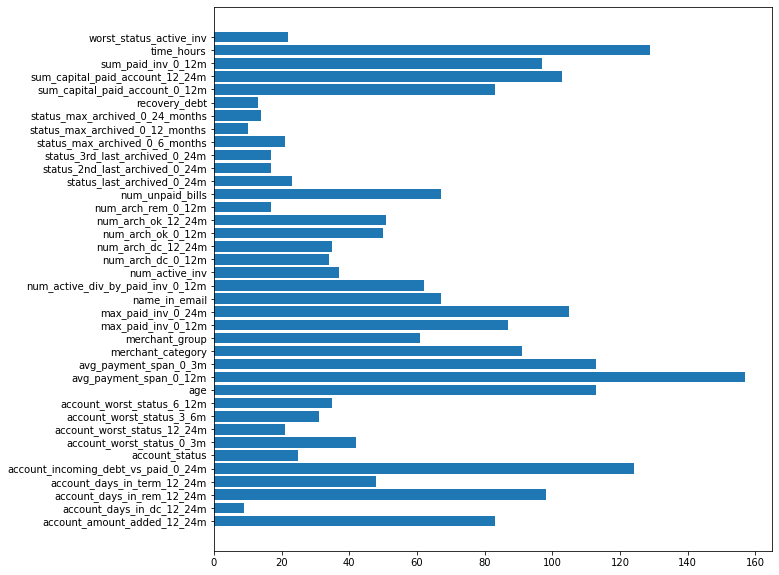

In [164]:
plt.figure(figsize=(10, 10))
plt.barh(np.arange(len(model.feature_importances_)), model.feature_importances_)
plt.yticks(np.arange(len(model.feature_importances_)), X.columns);